In [1]:
# import libraries
import pandas as pd
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# !pip install plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
# from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
#!pip install pm4py
import pm4py
from pm4py.objects.log.util.log import project_traces
from pm4py.objects.log.util import interval_lifecycle
# !pip install zipfile
import zipfile

#!pip install warnings
import warnings
warnings.filterwarnings("ignore")

# Trace Analysis & Filtering (PM4PY)
- https://pm4py.fit.fraunhofer.de/documentation


In [2]:
# function to print any trace (index) from log
def print_nth(log, index):
    print(str(project_traces(log)[index]))

In [3]:
# loading bpi zip (raw log data) and convert to event log object
# read data in csv 
zf = zipfile.ZipFile('../data/BPI_Challenge_2017_filtered.zip')
bpi = pd.read_csv(zf.open('BPI_Challenge_2017.csv'), sep=',')
bpi_log = pm4py.format_dataframe(bpi, case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')
bpi_log = pm4py.convert_to_event_log(bpi_log)


In [4]:
# check all starting activities
log_start = pm4py.get_start_activities(bpi_log)
log_start

{'A_Create Application': 12380}

In [5]:
# number of distinct trace variants
len(pm4py.get_variants_as_tuples(bpi_log))

107

In [6]:
# how does the process end
pm4py.get_end_activities(bpi_log)

{'O_Cancelled': 7224, 'A_Pending': 4394, 'O_Refused': 762}

In [7]:
# print 1st trace
print_nth(bpi_log, 0)

['A_Create Application', 'A_Submitted', 'A_Concept', 'A_Accepted', 'O_Create Offer', 'O_Created', 'O_Sent (mail and online)', 'A_Complete', 'A_Cancelled', 'O_Cancelled']


In [8]:
# convert log to dataframe and save
df = pm4py.convert_to_dataframe(bpi_log)
df.head(25)

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,concept:name,time:timestamp,@@index,@@case_index,case:concept:name
0,Application_1000086665,A_Create Application,User_1,2016-08-03 17:57:21.673000+00:00,2016-08-03 17:57:21.673000+00:00,Variant 2,2,complete,Application,Application_1000086665,...,NaN,NaN,NaN,NaN,NaN,A_Create Application,2016-08-03 17:57:21.673000+00:00,0,0,Application_1000086665
1,Application_1000086665,A_Submitted,User_1,2016-08-03 17:57:21.734000+00:00,2016-08-03 17:57:21.734000+00:00,Variant 2,2,complete,Application,ApplState_161925113,...,NaN,NaN,NaN,NaN,NaN,A_Submitted,2016-08-03 17:57:21.734000+00:00,1,0,Application_1000086665
2,Application_1000086665,A_Concept,User_1,2016-08-03 17:58:28.299000+00:00,2016-08-03 17:58:28.299000+00:00,Variant 2,2,complete,Application,ApplState_385184570,...,NaN,NaN,NaN,NaN,NaN,A_Concept,2016-08-03 17:58:28.299000+00:00,2,0,Application_1000086665
3,Application_1000086665,A_Accepted,User_5,2016-08-05 15:57:07.419000+00:00,2016-08-05 15:57:07.419000+00:00,Variant 2,2,complete,Application,ApplState_856156982,...,NaN,NaN,NaN,NaN,NaN,A_Accepted,2016-08-05 15:57:07.419000+00:00,3,0,Application_1000086665
4,Application_1000086665,O_Create Offer,User_5,2016-08-05 15:59:57.320000+00:00,2016-08-05 15:59:57.320000+00:00,Variant 2,2,complete,Offer,Offer_410892064,...,241.28,False,0.0,5000.0,NaN,O_Create Offer,2016-08-05 15:59:57.320000+00:00,4,0,Application_1000086665
5,Application_1000086665,O_Created,User_5,2016-08-05 15:59:58.162000+00:00,2016-08-05 15:59:58.162000+00:00,Variant 2,2,complete,Offer,OfferState_2071773136,...,NaN,NaN,NaN,NaN,Offer_410892064,O_Created,2016-08-05 15:59:58.162000+00:00,5,0,Application_1000086665
6,Application_1000086665,O_Sent (mail and online),User_5,2016-08-05 16:01:23.264000+00:00,2016-08-05 16:01:23.264000+00:00,Variant 2,2,complete,Offer,OfferState_388269514,...,NaN,NaN,NaN,NaN,Offer_410892064,O_Sent (mail and online),2016-08-05 16:01:23.264000+00:00,6,0,Application_1000086665
7,Application_1000086665,A_Complete,User_5,2016-08-05 16:01:23.288000+00:00,2016-08-05 16:01:23.288000+00:00,Variant 2,2,complete,Application,ApplState_1103800866,...,NaN,NaN,NaN,NaN,NaN,A_Complete,2016-08-05 16:01:23.288000+00:00,7,0,Application_1000086665
8,Application_1000086665,A_Cancelled,User_1,2016-09-05 08:00:36.710000+00:00,2016-09-05 08:00:36.710000+00:00,Variant 2,2,complete,Application,ApplState_544389273,...,NaN,NaN,NaN,NaN,NaN,A_Cancelled,2016-09-05 08:00:36.710000+00:00,8,0,Application_1000086665
9,Application_1000086665,O_Cancelled,User_1,2016-09-05 08:00:36.829000+00:00,2016-09-05 08:00:36.829000+00:00,Variant 2,2,complete,Offer,OfferState_1258287612,...,NaN,NaN,NaN,NaN,Offer_410892064,O_Cancelled,2016-09-05 08:00:36.829000+00:00,9,0,Application_1000086665


## Process Discovery

In [9]:
# alpha miner - net (places and transactions)
# general way to visualize net or tree or graph in pm4py - pm4py.view_{petri_net/tree/...}
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(bpi_log)
pm4py.view_petri_net(net)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# inductive miner algoritham, we can plot perocess tree, and can save the net same as alpha miner ((places and transactions))
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(bpi_log)
tree = pm4py.discover_process_tree_inductive(bpi_log)
pm4py.view_process_tree(tree)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

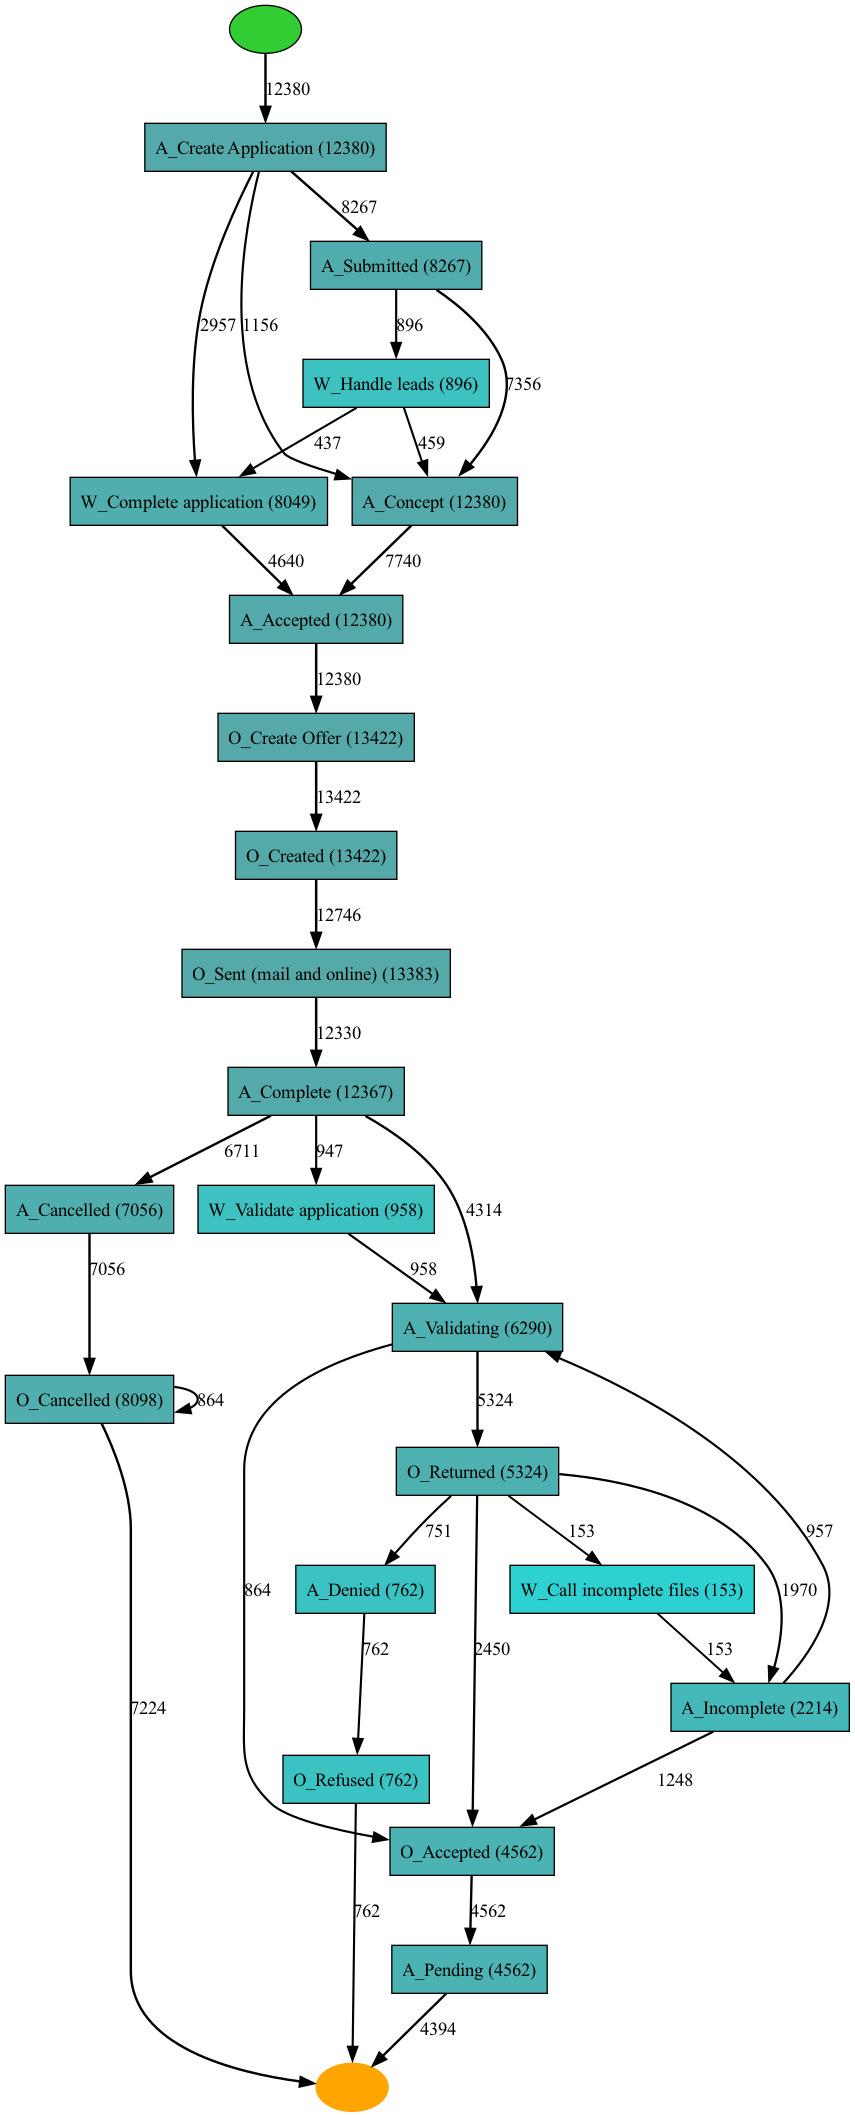

In [ ]:
# huristic miner
heu_net = pm4py.discover_heuristics_net(bpi_log, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)

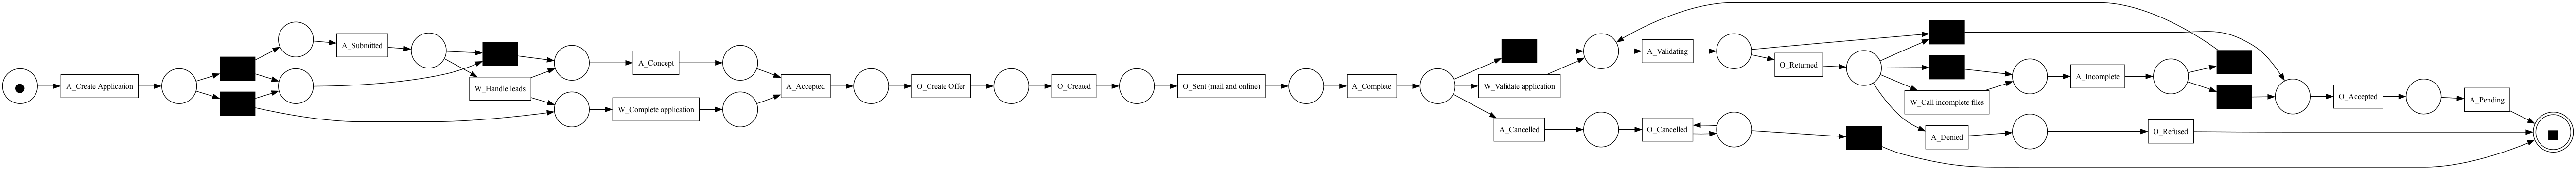

In [ ]:
# create and view petri net of huristic miner
net, im, fm = pm4py.discover_petri_net_heuristics(bpi_log, dependency_threshold=0.99)
pm4py.view_petri_net(net, im, fm)

In [ ]:
# plotting directly followes graph
# dfg, start_activities, end_activities = pm4py.discover_dfg(trace_log) # dfg with edge number
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(bpi_log) # dfg with duration
# pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'perf_dfg.svg') # to save image, performance dfg can only be saved and then viewed  
# pm4py.view_dfg(performance_dfg, start_activities, end_activities)

# ====================================================

# Data Analysis (Python)

In [10]:
# read data in csv 
zf = zipfile.ZipFile('../data/BPI_Challenge_2017_filtered.zip') 
trace = pd.read_csv(zf.open('BPI_Challenge_2017.csv'), sep=',')
trace.head(25)

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,ApplicationType,RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Application_652823628,A_Create Application,User_1,2016-01-01 10:51:15.304,2016-01-01 10:51:15.304,Variant 16,16,complete,Application,Application_652823628,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Application_652823628,A_Submitted,User_1,2016-01-01 10:51:15.352,2016-01-01 10:51:15.352,Variant 16,16,complete,Application,ApplState_1582051990,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Application_652823628,A_Concept,User_1,2016-01-01 10:52:36.413,2016-01-01 10:52:36.413,Variant 16,16,complete,Application,ApplState_642383566,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Application_652823628,A_Accepted,User_52,2016-01-02 12:23:04.299,2016-01-02 12:23:04.299,Variant 16,16,complete,Application,ApplState_99568828,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Application_652823628,O_Create Offer,User_52,2016-01-02 12:29:03.994,2016-01-02 12:29:03.994,Variant 16,16,complete,Offer,Offer_148581083,...,New credit,20000.0,20000.0,44.0,True,498.29,True,979.0,20000.0,NaN
5,Application_652823628,O_Created,User_52,2016-01-02 12:29:05.354,2016-01-02 12:29:05.354,Variant 16,16,complete,Offer,OfferState_1514834199,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_148581083
6,Application_652823628,O_Sent (mail and online),User_52,2016-01-02 12:30:28.606,2016-01-02 12:30:28.606,Variant 16,16,complete,Offer,OfferState_2051164740,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_148581083
7,Application_652823628,A_Complete,User_52,2016-01-02 12:30:28.633,2016-01-02 12:30:28.633,Variant 16,16,complete,Application,ApplState_946455804,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Application_652823628,A_Validating,User_117,2016-01-13 14:10:55.973,2016-01-13 14:10:55.973,Variant 16,16,complete,Application,ApplState_752879093,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Application_652823628,O_Returned,User_117,2016-01-13 14:11:03.569,2016-01-13 14:11:03.569,Variant 16,16,complete,Offer,OfferState_1310330551,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_148581083


In [11]:
# Identify rows where 'O_Create Offer' is followed by 'O_Created' in the 'Activity' column
mask = (trace['Activity'] == 'O_Create Offer') & (trace['Activity'].shift(-1) == 'O_Created')

for i in range(len(mask)-1):
    if ((not mask[i]) & mask[i+1]):
        trace['OfferID'][i+1] = trace['OfferID'][i+2]

In [12]:
mask = (trace['EventOrigin'] == 'Offer')
eventID = ""
for i in range(len(mask)):
    if (mask[i]):
        if (trace['FirstWithdrawalAmount'][i] > 0):
            FirstWithdrawalAmount = trace['FirstWithdrawalAmount'][i]
            NumberOfTerms = trace['NumberOfTerms'][i]
            Accepted = trace['Accepted'][i]
            MonthlyCost = trace['MonthlyCost'][i]
            Selected = trace['Selected'][i]
            CreditScore = trace['CreditScore'][i] 
            OfferedAmount = trace['OfferedAmount'][i]
            eventID = trace['EventID'][i]
        elif (trace['OfferID'][i] == eventID):
            trace['FirstWithdrawalAmount'][i] = FirstWithdrawalAmount
            trace['NumberOfTerms'][i] = NumberOfTerms 
            trace['Accepted'][i] = Accepted
            trace['MonthlyCost'][i] = MonthlyCost 
            trace['Selected'][i] = Selected 
            trace['CreditScore'][i] = CreditScore 
            trace['OfferedAmount'][i] = OfferedAmount 


In [13]:
trace.head(5)

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,ApplicationType,RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Application_652823628,A_Create Application,User_1,2016-01-01 10:51:15.304,2016-01-01 10:51:15.304,Variant 16,16,complete,Application,Application_652823628,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Application_652823628,A_Submitted,User_1,2016-01-01 10:51:15.352,2016-01-01 10:51:15.352,Variant 16,16,complete,Application,ApplState_1582051990,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Application_652823628,A_Concept,User_1,2016-01-01 10:52:36.413,2016-01-01 10:52:36.413,Variant 16,16,complete,Application,ApplState_642383566,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Application_652823628,A_Accepted,User_52,2016-01-02 12:23:04.299,2016-01-02 12:23:04.299,Variant 16,16,complete,Application,ApplState_99568828,...,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Application_652823628,O_Create Offer,User_52,2016-01-02 12:29:03.994,2016-01-02 12:29:03.994,Variant 16,16,complete,Offer,Offer_148581083,...,New credit,20000.0,20000.0,44.0,True,498.29,True,979.0,20000.0,Offer_148581083


In [20]:
# get persentage of missing values in a column
percent_missing = trace.isnull().sum() * 100 / len(trace)
missing_value_df = pd.DataFrame({'column_name': trace.columns,
                                 'percent_missing': percent_missing})

# extract list of coumns which are more then 30%
miss_ls = list(percent_missing[percent_missing>30].keys())

In [21]:
# save missing val information
missing_value_df.to_csv('../data/new_missing_vals_bpi.csv',index=False)
missing_value_df.head()

,column_name,percent_missing
Case ID,Case ID,0.0
Activity,Activity,0.0
Resource,Resource,0.0
Start Timestamp,Start Timestamp,0.0
Complete Timestamp,Complete Timestamp,0.0


## Adding Time features 

In [22]:
# adding trace['year'] and trace['month'] as feature
trace['year'] = pd.DatetimeIndex(trace['Start Timestamp']).year
trace['month'] = pd.DatetimeIndex(trace['Start Timestamp']).month
trace.tail()

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,year,month,case:concept:name,concept:name,time:timestamp
147719,Application_1350494635,O_Created,User_96,2017-01-02 20:25:00.040000+00:00,2017-01-02 20:25:00.040000+00:00,Variant 1,1,complete,Offer,OfferState_30384573,...,297.81,False,0.0,20000.0,Offer_1580299144,2017,1,Application_1350494635,O_Created,2017-01-02 20:25:00.040000+00:00
147720,Application_1350494635,O_Sent (mail and online),User_96,2017-01-02 20:27:20.453000+00:00,2017-01-02 20:27:20.453000+00:00,Variant 1,1,complete,Offer,OfferState_1959881309,...,297.81,False,0.0,20000.0,Offer_1580299144,2017,1,Application_1350494635,O_Sent (mail and online),2017-01-02 20:27:20.453000+00:00
147721,Application_1350494635,A_Complete,User_96,2017-01-02 20:27:20.474000+00:00,2017-01-02 20:27:20.474000+00:00,Variant 1,1,complete,Application,ApplState_1120616436,...,NaN,NaN,NaN,NaN,NaN,2017,1,Application_1350494635,A_Complete,2017-01-02 20:27:20.474000+00:00
147722,Application_1350494635,A_Cancelled,User_28,2017-01-16 10:51:21.114000+00:00,2017-01-16 10:51:21.114000+00:00,Variant 1,1,complete,Application,ApplState_1869071797,...,NaN,NaN,NaN,NaN,NaN,2017,1,Application_1350494635,A_Cancelled,2017-01-16 10:51:21.114000+00:00
147723,Application_1350494635,O_Cancelled,User_28,2017-01-16 10:51:21.139000+00:00,2017-01-16 10:51:21.139000+00:00,Variant 1,1,complete,Offer,OfferState_420066181,...,297.81,False,0.0,20000.0,Offer_1580299144,2017,1,Application_1350494635,O_Cancelled,2017-01-16 10:51:21.139000+00:00


In [17]:
# converting dataframe to event log
trace_log = pm4py.format_dataframe(trace, case_id='Case ID', activity_key='Activity', timestamp_key='Complete Timestamp', start_timestamp_key='Start Timestamp')
trace_log = pm4py.convert_to_event_log(trace_log)

In [18]:
# adding lead and waiting time
# @@approx_bh_partial_lead_time	- Incremental lead time associated to the event
# @@approx_bh_overall_wasted_time - Difference between the partial lead time and the partial cycle time values (for us same as above, as no cylce time for us)
# @@approx_bh_this_wasted_time -	Wasted time ONLY with regards to the activity described by the ‘interval’ even (time difference between activities)
trace_log = interval_lifecycle.assign_lead_cycle_time(trace_log)

In [19]:
# converting log to dataframe
df = pm4py.convert_to_dataframe(trace_log)

# save dataframe as csv 
df.to_csv('../data/working_trace_log.csv',index=False)

df.head()

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,time:timestamp,@@index,@@case_index,start_timestamp,@@approx_bh_partial_cycle_time,@@approx_bh_partial_lead_time,@@approx_bh_overall_wasted_time,@@approx_bh_this_wasted_time,@approx_bh_ratio_cycle_lead_time,case:concept:name
0,Application_1000086665,A_Create Application,User_1,2016-08-03 17:57:21.673000+00:00,2016-08-03 17:57:21.673000+00:00,Variant 2,2,complete,Application,Application_1000086665,...,2016-08-03 17:57:21.673000+00:00,0,0,2016-08-03 17:57:21.673000+00:00,0.0,0.000,0.000,0.000,1.0,Application_1000086665
1,Application_1000086665,A_Submitted,User_1,2016-08-03 17:57:21.734000+00:00,2016-08-03 17:57:21.734000+00:00,Variant 2,2,complete,Application,ApplState_161925113,...,2016-08-03 17:57:21.734000+00:00,1,0,2016-08-03 17:57:21.734000+00:00,0.0,0.000,0.000,0.000,1.0,Application_1000086665
2,Application_1000086665,A_Concept,User_1,2016-08-03 17:58:28.299000+00:00,2016-08-03 17:58:28.299000+00:00,Variant 2,2,complete,Application,ApplState_385184570,...,2016-08-03 17:58:28.299000+00:00,2,0,2016-08-03 17:58:28.299000+00:00,0.0,0.000,0.000,0.000,1.0,Application_1000086665
3,Application_1000086665,A_Accepted,User_5,2016-08-05 15:57:07.419000+00:00,2016-08-05 15:57:07.419000+00:00,Variant 2,2,complete,Application,ApplState_856156982,...,2016-08-05 15:57:07.419000+00:00,3,0,2016-08-05 15:57:07.419000+00:00,0.0,68227.419,68227.419,68227.419,0.0,Application_1000086665
4,Application_1000086665,O_Create Offer,User_5,2016-08-05 15:59:57.320000+00:00,2016-08-05 15:59:57.320000+00:00,Variant 2,2,complete,Offer,Offer_410892064,...,2016-08-05 15:59:57.320000+00:00,4,0,2016-08-05 15:59:57.320000+00:00,0.0,68397.320,68397.320,169.901,0.0,Application_1000086665
